🧮 Credit Risk Resampling + Ensemble Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN

1️⃣ Load Dataset

In [2]:
file_path = Path("loan_data_200.csv")  # replace if needed
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}\n")

✅ Dataset loaded successfully!
Shape: (200, 33)



2️⃣ Clean Data

In [3]:
df = df.dropna(axis="columns", how="all")
df = df.dropna()

if "loan_status" in df.columns:
    df = df[df["loan_status"] != "Issued"]

# Handle interest rate
if df["int_rate"].dtype == "object":
    df["int_rate"] = df["int_rate"].str.replace("%", "", regex=False)
    df["int_rate"] = pd.to_numeric(df["int_rate"], errors="coerce") / 100

# Encode categorical
categorical_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

3️⃣ Split and Scale

In [4]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4️⃣ Check Class Balance

📊 Class distribution (before resampling):
loan_status
1    103
0     47
Name: count, dtype: int64 



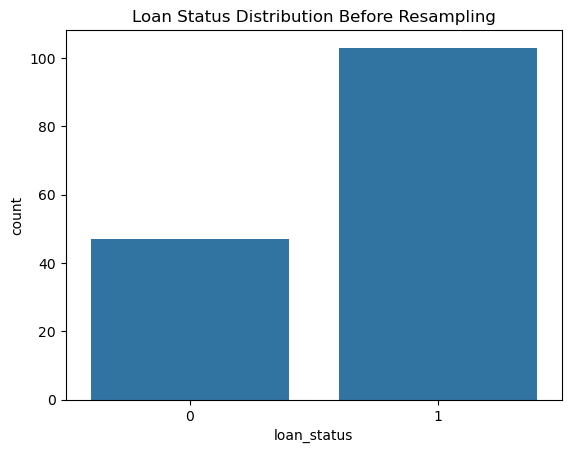

In [5]:
print("📊 Class distribution (before resampling):")
print(y_train.value_counts(), "\n")

sns.countplot(x=y_train)
plt.title("Loan Status Distribution Before Resampling")
plt.show()

5️⃣ Apply Resampling Techniques

In [7]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train_scaled, y_train)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

smoteenn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train_scaled, y_train)

print("✅ Resampling complete.")
print("After RandomOverSampler:\n", y_ros.value_counts())
print("After SMOTE:\n", y_smote.value_counts())
print("After SMOTEENN:\n", y_smoteenn.value_counts(), "\n")


✅ Resampling complete.
After RandomOverSampler:
 loan_status
1    103
0    103
Name: count, dtype: int64
After SMOTE:
 loan_status
1    103
0    103
Name: count, dtype: int64
After SMOTEENN:
 loan_status
0    81
1     7
Name: count, dtype: int64 



6️⃣ Train and Evaluate Models

In [8]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

def train_evaluate(X_train, y_train, label):
    print(f"\n================= {label} =================\n")
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, preds)
        results[name] = acc
        print(f"🚀 {name} ({label}) Accuracy: {acc:.4f}")
        print(confusion_matrix(y_test, preds))
        print(classification_report(y_test, preds))
    return results
results_original = train_evaluate(X_train_scaled, y_train, "Original Data")
results_ros = train_evaluate(X_ros, y_ros, "RandomOverSampler")
results_smote = train_evaluate(X_smote, y_smote, "SMOTE")
results_smoteenn = train_evaluate(X_smoteenn, y_smoteenn, "SMOTEENN")



================= Original Data =================

🚀 Random Forest (Original Data) Accuracy: 0.6600
[[ 0 15]
 [ 2 33]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.69      0.94      0.80        35

    accuracy                           0.66        50
   macro avg       0.34      0.47      0.40        50
weighted avg       0.48      0.66      0.56        50



D:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🚀 AdaBoost (Original Data) Accuracy: 0.6200
[[ 5 10]
 [ 9 26]]
              precision    recall  f1-score   support

           0       0.36      0.33      0.34        15
           1       0.72      0.74      0.73        35

    accuracy                           0.62        50
   macro avg       0.54      0.54      0.54        50
weighted avg       0.61      0.62      0.62        50

🚀 Gradient Boosting (Original Data) Accuracy: 0.6800
[[ 4 11]
 [ 5 30]]
              precision    recall  f1-score   support

           0       0.44      0.27      0.33        15
           1       0.73      0.86      0.79        35

    accuracy                           0.68        50
   macro avg       0.59      0.56      0.56        50
weighted avg       0.65      0.68      0.65        50


================= RandomOverSampler =================

🚀 Random Forest (RandomOverSampler) Accuracy: 0.6400
[[ 0 15]
 [ 3 32]]
              precision    recall  f1-score   support

           0       0.00     

D:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🚀 AdaBoost (RandomOverSampler) Accuracy: 0.6200
[[ 6  9]
 [10 25]]
              precision    recall  f1-score   support

           0       0.38      0.40      0.39        15
           1       0.74      0.71      0.72        35

    accuracy                           0.62        50
   macro avg       0.56      0.56      0.56        50
weighted avg       0.63      0.62      0.62        50

🚀 Gradient Boosting (RandomOverSampler) Accuracy: 0.6800
[[ 6  9]
 [ 7 28]]
              precision    recall  f1-score   support

           0       0.46      0.40      0.43        15
           1       0.76      0.80      0.78        35

    accuracy                           0.68        50
   macro avg       0.61      0.60      0.60        50
weighted avg       0.67      0.68      0.67        50


================= SMOTE =================

🚀 Random Forest (SMOTE) Accuracy: 0.6000
[[ 2 13]
 [ 7 28]]
              precision    recall  f1-score   support

           0       0.22      0.13      0.17 

D:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🚀 AdaBoost (SMOTE) Accuracy: 0.6200
[[ 5 10]
 [ 9 26]]
              precision    recall  f1-score   support

           0       0.36      0.33      0.34        15
           1       0.72      0.74      0.73        35

    accuracy                           0.62        50
   macro avg       0.54      0.54      0.54        50
weighted avg       0.61      0.62      0.62        50

🚀 Gradient Boosting (SMOTE) Accuracy: 0.6600
[[ 6  9]
 [ 8 27]]
              precision    recall  f1-score   support

           0       0.43      0.40      0.41        15
           1       0.75      0.77      0.76        35

    accuracy                           0.66        50
   macro avg       0.59      0.59      0.59        50
weighted avg       0.65      0.66      0.66        50


================= SMOTEENN =================

🚀 Random Forest (SMOTEENN) Accuracy: 0.3000
[[15  0]
 [35  0]]


D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureW

              precision    recall  f1-score   support

           0       0.30      1.00      0.46        15
           1       0.00      0.00      0.00        35

    accuracy                           0.30        50
   macro avg       0.15      0.50      0.23        50
weighted avg       0.09      0.30      0.14        50

🚀 AdaBoost (SMOTEENN) Accuracy: 0.3800
[[14  1]
 [30  5]]
              precision    recall  f1-score   support

           0       0.32      0.93      0.47        15
           1       0.83      0.14      0.24        35

    accuracy                           0.38        50
   macro avg       0.58      0.54      0.36        50
weighted avg       0.68      0.38      0.31        50

🚀 Gradient Boosting (SMOTEENN) Accuracy: 0.3600
[[12  3]
 [29  6]]
              precision    recall  f1-score   support

           0       0.29      0.80      0.43        15
           1       0.67      0.17      0.27        35

    accuracy                           0.36        50
   

7️⃣ Compare Model Performance


📈 Model Performance Comparison:

               Model  Original  RandomOverSampler  SMOTE  SMOTEENN
0      Random Forest      0.66               0.64   0.60      0.30
1           AdaBoost      0.62               0.62   0.62      0.38
2  Gradient Boosting      0.68               0.68   0.66      0.36


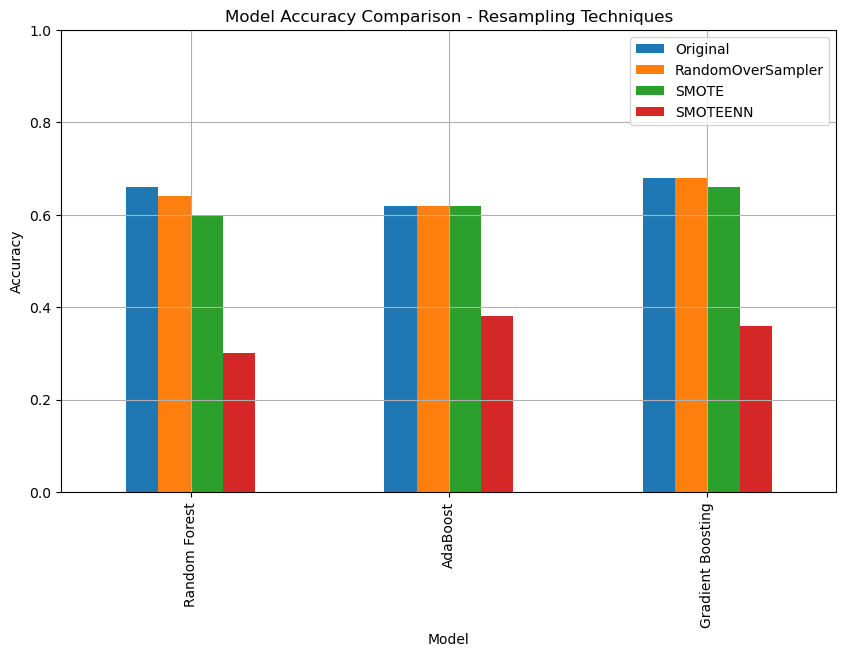

In [9]:
comparison_df = pd.DataFrame({
    "Model": list(models.keys()),
    "Original": list(results_original.values()),
    "RandomOverSampler": list(results_ros.values()),
    "SMOTE": list(results_smote.values()),
    "SMOTEENN": list(results_smoteenn.values())
})

print("\n📈 Model Performance Comparison:\n")
print(comparison_df)

comparison_df.set_index("Model").plot(kind="bar", figsize=(10,6))
plt.title("Model Accuracy Comparison - Resampling Techniques")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Save

In [11]:
df.to_csv("cleaned_credit_risk_resampling.csv", index=False)
print("✅ Cleaned dataset saved: cleaned_credit_risk_resampling.csv")


✅ Cleaned dataset saved: cleaned_credit_risk_resampling.csv
